In [1]:
pip install darts


Note: you may need to restart the kernel to use updated packages.


In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [181]:
df1=pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2014.csv')

In [182]:
df2 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2015.csv')

In [183]:
df3 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2016.csv')

In [184]:
df4 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2017.csv')

In [185]:
df5 =  pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2018.csv')

In [186]:
df6 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2019.csv')

In [187]:
df7 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2020.csv')

In [188]:
df8 =pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2021.csv')

In [189]:
df9 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2022.csv')

In [190]:
df1

,fips_code,county,state,sum,run_start_time
0,1037,Coosa,Alabama,12,2014-11-01 04:00:00
1,1051,Elmore,Alabama,7,2014-11-01 04:00:00
2,1109,Pike,Alabama,1,2014-11-01 04:00:00
3,1121,Talladega,Alabama,31,2014-11-01 04:00:00
4,4017,Navajo,Arizona,1,2014-11-01 04:00:00
...,...,...,...,...,...
1689455,55029,Door,Wisconsin,1,2014-12-31 00:00:00
1689456,55079,Milwaukee,Wisconsin,1,2014-12-31 00:00:00
1689457,55093,Pierce,Wisconsin,6,2014-12-31 00:00:00
1689458,55125,Vilas,Wisconsin,6,2014-12-31 00:00:00


In [191]:
sandiego_df1 = df1[(df1['fips_code'] == 6073) & (df1['county'] == 'San Diego')]

In [192]:
sandiego_df1

,fips_code,county,state,sum,run_start_time
2893,6073,San Diego,California,377,2014-11-01 06:30:00
8603,6073,San Diego,California,130,2014-11-01 11:15:00
8944,6073,San Diego,California,3191,2014-11-01 11:30:00
9305,6073,San Diego,California,3191,2014-11-01 11:45:00
9677,6073,San Diego,California,3191,2014-11-01 12:00:00
...,...,...,...,...,...
1688049,6073,San Diego,California,134,2014-12-30 23:00:00
1688346,6073,San Diego,California,1593,2014-12-30 23:15:00
1688631,6073,San Diego,California,1593,2014-12-30 23:30:00
1688912,6073,San Diego,California,1593,2014-12-30 23:45:00


In [193]:
# Convert run_start_time to datetime format
sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df1.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\1902342349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])


In [194]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df1 = sandiego_df1.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df1 = hourly_sum_df1.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df1 = hourly_sum_df1.rename(columns={'sum': 'hourly_sum'})

In [195]:
hourly_sum_df1.head()

,county,run_start_time,fips_code,hourly_sum
0,San Diego,2014-11-01 06:00:00,6073,377
1,San Diego,2014-11-01 11:00:00,18219,6512
2,San Diego,2014-11-01 12:00:00,24292,11202
3,San Diego,2014-11-01 13:00:00,24292,7719
4,San Diego,2014-11-01 14:00:00,24292,3458


In [196]:
hourly_sum_df1.drop(columns=['county','fips_code'], inplace=True)

In [197]:
hourly_sum_df1

,run_start_time,hourly_sum
0,2014-11-01 06:00:00,377
1,2014-11-01 11:00:00,6512
2,2014-11-01 12:00:00,11202
3,2014-11-01 13:00:00,7719
4,2014-11-01 14:00:00,3458
...,...,...
1218,2014-12-30 20:00:00,717
1219,2014-12-30 21:00:00,622
1220,2014-12-30 22:00:00,536
1221,2014-12-30 23:00:00,4913


In [198]:
sandiego_df2 = df2[(df2['fips_code'] == 6073) & (df2['county'] == 'San Diego')]

In [199]:
sandiego_df2

,fips_code,county,state,sum,run_start_time
4628,6073,San Diego,California,126,2015-01-01 05:45:00
4809,6073,San Diego,California,126,2015-01-01 06:00:00
4987,6073,San Diego,California,126,2015-01-01 06:15:00
5160,6073,San Diego,California,126,2015-01-01 06:30:00
5334,6073,San Diego,California,126,2015-01-01 06:45:00
...,...,...,...,...,...
12936890,6073,San Diego,California,112,2015-12-30 23:00:00
12937345,6073,San Diego,California,112,2015-12-30 23:15:00
12937800,6073,San Diego,California,112,2015-12-30 23:30:00
12938260,6073,San Diego,California,112,2015-12-30 23:45:00


In [200]:
# Convert run_start_time to datetime format
sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df2.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\4224898449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])


In [201]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df2 = sandiego_df2.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df2 = hourly_sum_df2.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df2 = hourly_sum_df2.rename(columns={'sum': 'hourly_sum'})

In [202]:
hourly_sum_df2.head()

,county,run_start_time,fips_code,hourly_sum
0,San Diego,2015-01-01 05:00:00,6073,126
1,San Diego,2015-01-01 06:00:00,24292,504
2,San Diego,2015-01-01 07:00:00,6073,2
3,San Diego,2015-01-01 12:00:00,24292,6331
4,San Diego,2015-01-01 13:00:00,24292,5252


In [203]:
hourly_sum_df2.drop(columns=['county','fips_code'], inplace=True)

In [204]:
hourly_sum_df2

,run_start_time,hourly_sum
0,2015-01-01 05:00:00,126
1,2015-01-01 06:00:00,504
2,2015-01-01 07:00:00,2
3,2015-01-01 12:00:00,6331
4,2015-01-01 13:00:00,5252
...,...,...
7756,2015-12-30 20:00:00,700
7757,2015-12-30 21:00:00,535
7758,2015-12-30 22:00:00,549
7759,2015-12-30 23:00:00,448


In [205]:
sandiego_df3 = df3[(df3['fips_code'] == 6073) & (df3['county'] == 'San Diego')]

In [206]:
sandiego_df3

,fips_code,county,state,sum,run_start_time
19608,6073,San Diego,California,1,2016-01-01 18:15:00
19989,6073,San Diego,California,1,2016-01-01 18:30:00
20375,6073,San Diego,California,1,2016-01-01 18:45:00
20762,6073,San Diego,California,1,2016-01-01 19:00:00
21142,6073,San Diego,California,1,2016-01-01 19:15:00
...,...,...,...,...,...
13300574,6073,San Diego,California,20,2016-12-30 20:15:00
13300960,6073,San Diego,California,20,2016-12-30 20:30:00
13301345,6073,San Diego,California,20,2016-12-30 20:45:00
13301737,6073,San Diego,California,20,2016-12-30 21:00:00


In [207]:
# Convert run_start_time to datetime format
sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df3.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\3611938441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])


In [208]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df3 = sandiego_df3.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df3 = hourly_sum_df3.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df3 = hourly_sum_df3.rename(columns={'sum': 'hourly_sum'})

In [209]:
hourly_sum_df3.drop(columns=['county','fips_code'], inplace=True)

In [210]:
hourly_sum_df3

,run_start_time,hourly_sum
0,2016-01-01 18:00:00,3
1,2016-01-01 19:00:00,4
2,2016-01-01 20:00:00,4
3,2016-01-01 21:00:00,4
4,2016-01-01 22:00:00,5688
...,...,...
8008,2016-12-30 17:00:00,1637
8009,2016-12-30 18:00:00,2602
8010,2016-12-30 19:00:00,126
8011,2016-12-30 20:00:00,80


In [211]:
sandiego_df4 = df4[(df4['fips_code'] == 6073) & (df4['county'] == 'San Diego')]

In [212]:
sandiego_df4

,fips_code,county,state,sum,run_start_time
11,6073,San Diego,California,151.0,2017-01-01 00:00:00
272,6073,San Diego,California,151.0,2017-01-01 00:15:00
532,6073,San Diego,California,151.0,2017-01-01 00:30:00
781,6073,San Diego,California,412.0,2017-01-01 00:45:00
1021,6073,San Diego,California,2516.0,2017-01-01 01:00:00
...,...,...,...,...,...
15076316,6073,San Diego,California,1.0,2017-12-30 23:00:00
15076740,6073,San Diego,California,1.0,2017-12-30 23:15:00
15077156,6073,San Diego,California,1.0,2017-12-30 23:30:00
15077562,6073,San Diego,California,1.0,2017-12-30 23:45:00


In [213]:
# Convert run_start_time to datetime format
sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df4.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\3543013722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])


In [214]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df4 = sandiego_df4.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df4 = hourly_sum_df4.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df4 = hourly_sum_df4.rename(columns={'sum': 'hourly_sum'})

In [215]:
hourly_sum_df4.head()

,county,run_start_time,fips_code,hourly_sum
0,San Diego,2017-01-01 00:00:00,24292,865.0
1,San Diego,2017-01-01 01:00:00,24292,8089.0
2,San Diego,2017-01-01 02:00:00,24292,5282.0
3,San Diego,2017-01-01 03:00:00,24292,4014.0
4,San Diego,2017-01-01 04:00:00,24292,852.0


In [216]:
hourly_sum_df4.drop(columns=['county','fips_code'], inplace=True)

In [217]:
hourly_sum_df4

,run_start_time,hourly_sum
0,2017-01-01 00:00:00,865.0
1,2017-01-01 01:00:00,8089.0
2,2017-01-01 02:00:00,5282.0
3,2017-01-01 03:00:00,4014.0
4,2017-01-01 04:00:00,852.0
...,...,...
7412,2017-12-30 20:00:00,21.0
7413,2017-12-30 21:00:00,28.0
7414,2017-12-30 22:00:00,4.0
7415,2017-12-30 23:00:00,4.0


In [218]:
sandiego_df5 = df5[(df5['fips_code'] == 6073) & (df5['county'] == 'San Diego')]

In [219]:
sandiego_df5

,fips_code,county,state,sum,run_start_time
8667,6073,San Diego,California,1149.0,2018-01-01 05:15:00
9064,6073,San Diego,California,1149.0,2018-01-01 05:30:00
9467,6073,San Diego,California,1149.0,2018-01-01 05:45:00
9876,6073,San Diego,California,1149.0,2018-01-01 06:00:00
10307,6073,San Diego,California,1149.0,2018-01-01 06:15:00
...,...,...,...,...,...
21774253,6073,San Diego,California,6.0,2018-12-30 23:00:00
21774773,6073,San Diego,California,6.0,2018-12-30 23:15:00
21775304,6073,San Diego,California,6.0,2018-12-30 23:30:00
21775827,6073,San Diego,California,6.0,2018-12-30 23:45:00


In [220]:
# Convert run_start_time to datetime format
sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df5.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\4223640805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])


In [221]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df5 = sandiego_df5.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df5 = hourly_sum_df5.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df5 = hourly_sum_df5.rename(columns={'sum': 'hourly_sum'})

In [222]:
hourly_sum_df5.head()

,county,run_start_time,fips_code,hourly_sum
0,San Diego,2018-01-01 05:00:00,18219,3447.0
1,San Diego,2018-01-01 06:00:00,24292,4596.0
2,San Diego,2018-01-01 07:00:00,24292,4596.0
3,San Diego,2018-01-01 08:00:00,6073,1149.0
4,San Diego,2018-01-01 09:00:00,24292,1596.0


In [223]:
hourly_sum_df5.drop(columns=['county','fips_code'], inplace=True)

In [224]:
hourly_sum_df5

,run_start_time,hourly_sum
0,2018-01-01 05:00:00,3447.0
1,2018-01-01 06:00:00,4596.0
2,2018-01-01 07:00:00,4596.0
3,2018-01-01 08:00:00,1149.0
4,2018-01-01 09:00:00,1596.0
...,...,...
8033,2018-12-30 20:00:00,24.0
8034,2018-12-30 21:00:00,24.0
8035,2018-12-30 22:00:00,24.0
8036,2018-12-30 23:00:00,24.0


In [225]:
sandiego_df6 = df6[(df6['fips_code'] == 6073) & (df6['county'] == 'San Diego')]

In [226]:
sandiego_df6

,fips_code,county,state,sum,run_start_time
16509,6073,San Diego,California,133.0,2019-01-01 06:00:00
17174,6073,San Diego,California,133.0,2019-01-01 06:15:00
17862,6073,San Diego,California,133.0,2019-01-01 06:30:00
18551,6073,San Diego,California,133.0,2019-01-01 06:45:00
56814,6073,San Diego,California,248.0,2019-01-01 19:45:00
...,...,...,...,...,...
24059014,6073,San Diego,California,13.0,2019-12-30 20:30:00
24060136,6073,San Diego,California,12.0,2019-12-30 20:45:00
24061232,6073,San Diego,California,7.0,2019-12-30 21:00:00
24062300,6073,San Diego,California,7.0,2019-12-30 21:15:00


In [227]:
# Convert run_start_time to datetime format
sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df6.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\2072086472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])


In [228]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df6 = sandiego_df6.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df6 = hourly_sum_df6.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df6 = hourly_sum_df6.rename(columns={'sum': 'hourly_sum'})

In [229]:
hourly_sum_df6.head()

,county,run_start_time,fips_code,hourly_sum
0,San Diego,2019-01-01 06:00:00,24292,532.0
1,San Diego,2019-01-01 19:00:00,6073,248.0
2,San Diego,2019-01-01 20:00:00,24292,540.0
3,San Diego,2019-01-01 21:00:00,24292,44.0
4,San Diego,2019-01-01 22:00:00,24292,44.0


In [230]:
hourly_sum_df6.drop(columns=['county','fips_code'], inplace=True)

In [231]:
hourly_sum_df6

,run_start_time,hourly_sum
0,2019-01-01 06:00:00,532.0
1,2019-01-01 19:00:00,248.0
2,2019-01-01 20:00:00,540.0
3,2019-01-01 21:00:00,44.0
4,2019-01-01 22:00:00,44.0
...,...,...
8109,2019-12-30 17:00:00,570.0
8110,2019-12-30 18:00:00,906.0
8111,2019-12-30 19:00:00,155.0
8112,2019-12-30 20:00:00,52.0


In [232]:
sandiego_df7 = df7[(df7['fips_code'] == 6073) & (df7['county'] == 'San Diego')]

In [233]:
# Convert run_start_time to datetime format
sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df7.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\1624955678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])


In [234]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df7 = sandiego_df7.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df7 = hourly_sum_df7.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df7 = hourly_sum_df7.rename(columns={'sum': 'hourly_sum'})

In [235]:
hourly_sum_df7.drop(columns=['county','fips_code'], inplace=True)

In [236]:
hourly_sum_df7

,run_start_time,hourly_sum
0,2020-01-01 00:00:00,2424.0
1,2020-01-01 01:00:00,2424.0
2,2020-01-01 02:00:00,3322.0
3,2020-01-01 03:00:00,2424.0
4,2020-01-01 04:00:00,2424.0
...,...,...
8189,2020-12-30 20:00:00,184.0
8190,2020-12-30 21:00:00,151.0
8191,2020-12-30 22:00:00,77.0
8192,2020-12-30 23:00:00,24.0


In [237]:
sandiego_df8 = df8[(df8['fips_code'] == 6073) & (df8['county'] == 'San Diego')]

In [238]:
sandiego_df8

,fips_code,county,state,sum,run_start_time
51,6073,San Diego,California,1122.0,2021-01-01 00:00:00
645,6073,San Diego,California,7.0,2021-01-01 00:15:00
1150,6073,San Diego,California,7.0,2021-01-01 00:30:00
1633,6073,San Diego,California,256.0,2021-01-01 00:45:00
2120,6073,San Diego,California,359.0,2021-01-01 01:00:00
...,...,...,...,...,...
24822981,6073,San Diego,California,5.0,2021-12-30 23:00:00
24823613,6073,San Diego,California,5.0,2021-12-30 23:15:00
24824236,6073,San Diego,California,5.0,2021-12-30 23:30:00
24824861,6073,San Diego,California,5.0,2021-12-30 23:45:00


In [239]:
# Convert run_start_time to datetime format
sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df8.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\809091036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])


In [240]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df8 = sandiego_df8.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df8 = hourly_sum_df8.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df8 = hourly_sum_df8.rename(columns={'sum': 'hourly_sum'})

In [63]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df8 = sandiego_df8.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df8 = hourly_sum_df8.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df8 = hourly_sum_df8.rename(columns={'sum': 'hourly_sum'})

In [241]:
hourly_sum_df8.drop(columns=['county','fips_code'], inplace=True)

In [242]:
hourly_sum_df8

,run_start_time,hourly_sum
0,2021-01-01 00:00:00,1392.0
1,2021-01-01 01:00:00,362.0
2,2021-01-01 02:00:00,4.0
3,2021-01-01 03:00:00,4.0
4,2021-01-01 04:00:00,4.0
...,...,...
8190,2021-12-30 20:00:00,129.0
8191,2021-12-30 21:00:00,27.0
8192,2021-12-30 22:00:00,4.0
8193,2021-12-30 23:00:00,20.0


In [243]:
sandiego_df9 = df9[(df9['fips_code'] == 6073) & (df9['county'] == 'San Diego')]

In [244]:
# Convert run_start_time to datetime format
sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df9.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\758513731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])


In [245]:
# Group by county FIPS code and run start time, and apply hourly sum
hourly_sum_df9 = sandiego_df9.groupby(['county', pd.Grouper(freq='H')]).sum(numeric_only=True)

# Reset index to get county FIPS code and run start time as columns
hourly_sum_df9 = hourly_sum_df9.reset_index()

# Rename the sum column to 'hourly_sum'
hourly_sum_df9 = hourly_sum_df9.rename(columns={'sum': 'hourly_sum'})

In [246]:
hourly_sum_df9.drop(columns=['county','fips_code'], inplace=True)

In [247]:
hourly_sum_df9

,run_start_time,hourly_sum
0,2022-01-01 00:00:00,208.0
1,2022-01-01 01:00:00,142.0
2,2022-01-01 02:00:00,76.0
3,2022-01-01 03:00:00,76.0
4,2022-01-01 04:00:00,1454.0
...,...,...
7111,2022-11-12 09:00:00,24.0
7112,2022-11-12 15:00:00,88.0
7113,2022-11-12 16:00:00,100.0
7114,2022-11-12 17:00:00,100.0


In [248]:
df_final = pd.concat([hourly_sum_df1,hourly_sum_df2, hourly_sum_df3, hourly_sum_df4, hourly_sum_df5, hourly_sum_df6, hourly_sum_df7, hourly_sum_df8, hourly_sum_df9])

In [249]:
df_final

,run_start_time,hourly_sum
0,2014-11-01 06:00:00,377.0
1,2014-11-01 11:00:00,6512.0
2,2014-11-01 12:00:00,11202.0
3,2014-11-01 13:00:00,7719.0
4,2014-11-01 14:00:00,3458.0
...,...,...
7111,2022-11-12 09:00:00,24.0
7112,2022-11-12 15:00:00,88.0
7113,2022-11-12 16:00:00,100.0
7114,2022-11-12 17:00:00,100.0


In [250]:
# Convert run_start_time to datetime format
df_final['run_start_time'] = pd.to_datetime(df_final['run_start_time'])

# Set the run_start_time column as the DataFrame index
df_final.set_index('run_start_time', inplace=True)

In [251]:
df_final

,hourly_sum
run_start_time,
2014-11-01 06:00:00,377.0
2014-11-01 11:00:00,6512.0
2014-11-01 12:00:00,11202.0
2014-11-01 13:00:00,7719.0
2014-11-01 14:00:00,3458.0
...,...
2022-11-12 09:00:00,24.0
2022-11-12 15:00:00,88.0
2022-11-12 16:00:00,100.0


In [252]:
df = df_final.sort_index()

In [253]:
df

,hourly_sum
run_start_time,
2014-11-01 06:00:00,377.0
2014-11-01 11:00:00,6512.0
2014-11-01 12:00:00,11202.0
2014-11-01 13:00:00,7719.0
2014-11-01 14:00:00,3458.0
...,...
2022-11-12 09:00:00,24.0
2022-11-12 15:00:00,88.0
2022-11-12 16:00:00,100.0


In [254]:
df=df.reset_index()

In [255]:
# Convert the "run_start_time" column to a datetime type
df['run_start_time'] = pd.to_datetime(df['run_start_time'])

# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['run_start_time'].dt.date



In [256]:
df

,run_start_time,hourly_sum,date
0,2014-11-01 06:00:00,377.0,2014-11-01
1,2014-11-01 11:00:00,6512.0,2014-11-01
2,2014-11-01 12:00:00,11202.0,2014-11-01
3,2014-11-01 13:00:00,7719.0,2014-11-01
4,2014-11-01 14:00:00,3458.0,2014-11-01
...,...,...,...
64066,2022-11-12 09:00:00,24.0,2022-11-12
64067,2022-11-12 15:00:00,88.0,2022-11-12
64068,2022-11-12 16:00:00,100.0,2022-11-12
64069,2022-11-12 17:00:00,100.0,2022-11-12


In [257]:
# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['run_start_time'].dt.date

In [258]:
df

,run_start_time,hourly_sum,date
0,2014-11-01 06:00:00,377.0,2014-11-01
1,2014-11-01 11:00:00,6512.0,2014-11-01
2,2014-11-01 12:00:00,11202.0,2014-11-01
3,2014-11-01 13:00:00,7719.0,2014-11-01
4,2014-11-01 14:00:00,3458.0,2014-11-01
...,...,...,...
64066,2022-11-12 09:00:00,24.0,2022-11-12
64067,2022-11-12 15:00:00,88.0,2022-11-12
64068,2022-11-12 16:00:00,100.0,2022-11-12
64069,2022-11-12 17:00:00,100.0,2022-11-12


In [259]:
# Group the 'hourly_sum' data by date and sum the values for each date
df_grouped = df.groupby('date').sum()

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\1521914013.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('date').sum()


In [83]:
df['date']=df.index.date

AttributeError: 'RangeIndex' object has no attribute 'date'

In [260]:
df_grouped

,hourly_sum
date,
2014-11-01,65732.0
2014-11-02,5471.0
2014-11-03,5513.0
2014-11-04,7409.0
2014-11-05,8799.0
...,...
2022-11-08,67171.0
2022-11-09,21563.0
2022-11-10,9669.0


In [261]:
df1=df_grouped

df1

In [86]:
series=df1.squeeze()

In [265]:
df1=df1.reset_index()

In [88]:
print(series)

date
2014-11-01    65732.0
2014-11-02     5471.0
2014-11-03     5513.0
2014-11-04     7409.0
2014-11-05     8799.0
               ...   
2022-11-08    67171.0
2022-11-09    21563.0
2022-11-10     9669.0
2022-11-11    33551.0
2022-11-12      483.0
Name: hourly_sum, Length: 2907, dtype: float64


In [266]:
df1

,date,hourly_sum
0,2014-11-01,65732.0
1,2014-11-02,5471.0
2,2014-11-03,5513.0
3,2014-11-04,7409.0
4,2014-11-05,8799.0
...,...,...
2902,2022-11-08,67171.0
2903,2022-11-09,21563.0
2904,2022-11-10,9669.0
2905,2022-11-11,33551.0


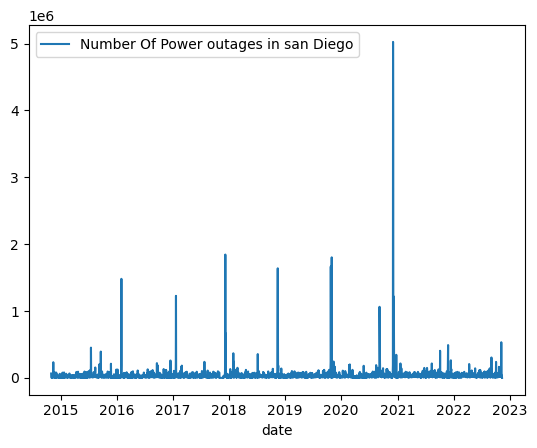

In [89]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(label="Number Of Power outages in san Diego")
plt.legend();

In [90]:
from darts.dataprocessing.transformers import Scaler

In [91]:
df=df.reset_index()

In [92]:
scalerp=Scaler()


In [93]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

In [94]:

# Convert the data into a TimeSeries object
series = TimeSeries.from_values(df1)

In [95]:
series_scaled = scalerp.fit_transform(series)

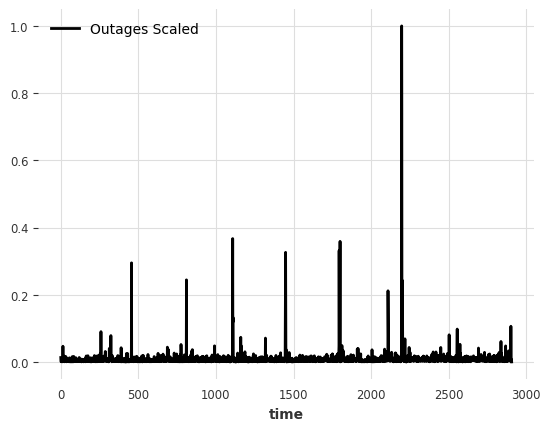

In [96]:
# plottingair_ds.plot(label="Number Of Passengers")
series_scaled.plot(label = "Outages Scaled")

plt.legend();

In [96]:
df=df.drop(['run_start_time'],axis=1)

In [97]:
series_train,  series_val = series_scaled[:-36],series_scaled[-36:] 

In [98]:
type(series_train)

darts.timeseries.TimeSeries

In [100]:
from darts.models import NBEATSModel
print('model_loaded')

model_loaded


In [125]:
pip install --upgrade transformers

                                              0.0/7.4 MB ? eta -:--:--
                                              0.2/7.4 MB 3.1 MB/s eta 0:00:03
     ---                                      0.6/7.4 MB 6.1 MB/s eta 0:00:02
     --------                                 1.7/7.4 MB 11.8 MB/s eta 0:00:01
     ---------------                          2.9/7.4 MB 17.0 MB/s eta 0:00:01
     --------------------------               5.0/7.4 MB 21.2 MB/s eta 0:00:01
     --------------------------------------   7.2/7.4 MB 25.5 MB/s eta 0:00:01
     ---------------------------------------- 7.4/7.4 MB 23.6 MB/s eta 0:00:00
                                              0.0/268.8 kB ? eta -:--:--
     ---------------------------------------- 268.8/268.8 kB ? eta 0:00:00
                                              0.0/3.5 MB ? eta -:--:--
     --------------------                     1.8/3.5 MB 56.8 MB/s eta 0:00:01
     ---------------------------------------  3.5/3.5 MB 44.2 MB/s eta 0:00:01
 

In [101]:
from darts.metrics import mape

In [102]:
# creating a model object
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)

In [103]:
df

,index,hourly_sum,date
0,0,377.0,2014-11-01
1,1,6512.0,2014-11-01
2,2,11202.0,2014-11-01
3,3,7719.0,2014-11-01
4,4,3458.0,2014-11-01
...,...,...,...
64066,64066,24.0,2022-11-12
64067,64067,88.0,2022-11-12
64068,64068,100.0,2022-11-12
64069,64069,100.0,2022-11-12


In [104]:
# fitting the model
model.fit([series_train], verbose = True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=15)

In [90]:
# Convert run_start_time to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the run_start_time column as the DataFrame index
df.set_index('date', inplace=True)

In [105]:
from darts.metrics import mape
pred_outages = model.predict(n = 36, series = series_train)

print("Mape = {:.2f}%".format(mape(series_scaled , pred_outages)))


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

Mape = 587.79%


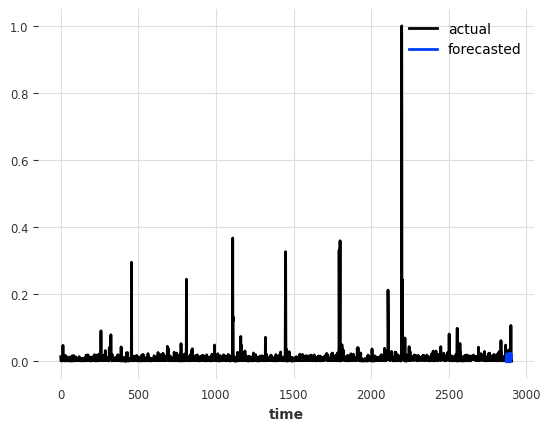

In [106]:
# plotting results
series_scaled .plot(label = "actual")
pred_outages.plot(label = "forecasted") # validation data set
plt.legend()
# plotting results




 

In [110]:
# Convert run_start_time to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the run_start_time column as the DataFrame index
df.set_index('date', inplace=True)

In [108]:
df=df.reset_index()


In [111]:
df

,level_0,index,hourly_sum
date,,,
2014-11-01,0,0,377.0
2014-11-01,1,1,6512.0
2014-11-01,2,2,11202.0
2014-11-01,3,3,7719.0
2014-11-01,4,4,3458.0
...,...,...,...
2022-11-12,64066,64066,24.0
2022-11-12,64067,64067,88.0
2022-11-12,64068,64068,100.0


In [112]:
import darts

In [113]:
df.drop(['level_0','index'], axis=1)

,hourly_sum
date,
2014-11-01,377.0
2014-11-01,6512.0
2014-11-01,11202.0
2014-11-01,7719.0
2014-11-01,3458.0
...,...
2022-11-12,24.0
2022-11-12,88.0
2022-11-12,100.0


In [114]:
series=df.squeeze()

<Axes: xlabel='date'>

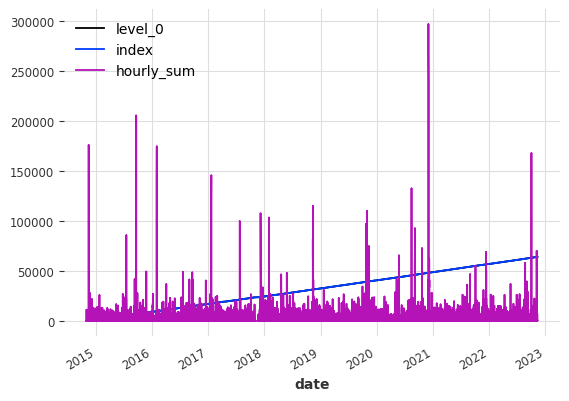

In [115]:
series.plot(label="Number Of hourly ")

In [116]:
from darts.models import AutoARIMA

In [117]:
from darts.models import FFT

In [118]:
# facebook prophet model
from darts.models import Prophet

In [124]:
from darts.backtesting import backtest_forecasting

ModuleNotFoundError: No module named 'darts.backtesting'

In [120]:
from darts.metrics import mape

In [125]:

pip install backtest

Note: you may need to restart the kernel to use updated packages.


In [126]:
from darts import TimeSeries
from darts.models import Prophet, ExponentialSmoothing, AutoARIMA, Theta, RegressionEnsembleModel, RegressionModel

In [127]:
from darts.metrics import rmse 

def eval_model(model, flow,
               past_covariates=None,  future_covariates=None,
              retrain = False,
              forecast_horizon = 10,
              last_obs = 200):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, 
    # with a horizon of `forecast_horizon` steps:
    backtest = model.historical_forecasts(series=flow, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=0.8, 
                                          retrain=retrain,
                                          verbose=True, 
                                          forecast_horizon=forecast_horizon)
    
    flow[-len(backtest) - last_obs:].plot()
    backtest.plot(label='backtest (n=' + str(forecast_horizon) + ')')
    
    print('Backtest RMSE = {}'.format(np.round( rmse(flow, backtest) )))

In [130]:
df = df.loc[df.Date > CFG.cutoff]
series = TimeSeries.from_dataframe(df, 'Date', 'hourly_sum', freq = 'D')
series.plot()
# df.set_index('Date').VWAP.plot()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [132]:
df

,level_0,index,hourly_sum
date,,,
2014-11-01,0,0,377.0
2014-11-01,1,1,6512.0
2014-11-01,2,2,11202.0
2014-11-01,3,3,7719.0
2014-11-01,4,4,3458.0
...,...,...,...
2022-11-12,64066,64066,24.0
2022-11-12,64067,64067,88.0
2022-11-12,64068,64068,100.0


In [135]:
df=df.drop(['level_0','index'], axis=1)

In [136]:
df

,hourly_sum
date,
2014-11-01,377.0
2014-11-01,6512.0
2014-11-01,11202.0
2014-11-01,7719.0
2014-11-01,3458.0
...,...
2022-11-12,24.0
2022-11-12,88.0
2022-11-12,100.0


In [138]:
df=df.reset_index()

In [139]:




# Assuming CFG.cutoff is the desired cutoff date
df = df.loc[df['date'] > CFG.cutoff]

# Create the TimeSeries object from the DataFrame
series = TimeSeries.from_dataframe(df, 'date', 'hourly_sum', freq='D')

# Plot the TimeSeries data
series.plot()

NameError: name 'CFG' is not defined

In [141]:
# ExponentialSmoothing can't handle NAs :-(
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)

# split into training / validation
train, val = series[:-60], series[-60:]

AttributeError: 'DataFrame' object has no attribute 'pd_dataframe'

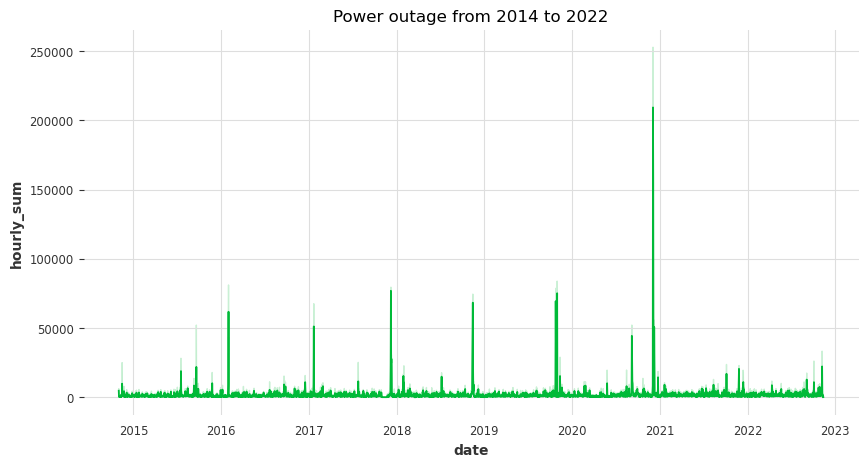

In [143]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.date, y = df["hourly_sum"], color = "#00BA38")
ax.title.set_text('Power outage from 2014 to 2022')


In [144]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df['date'] = df.Datetime
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['date','hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df[label]
        return X, y
    return X

In [147]:
# See our features and target
X, y = create_features(df, label='hourly_sum')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [148]:
df

,date,hourly_sum
0,2014-11-01,377.0
1,2014-11-01,6512.0
2,2014-11-01,11202.0
3,2014-11-01,7719.0
4,2014-11-01,3458.0
...,...,...
64066,2022-11-12,24.0
64067,2022-11-12,88.0
64068,2022-11-12,100.0
64069,2022-11-12,100.0


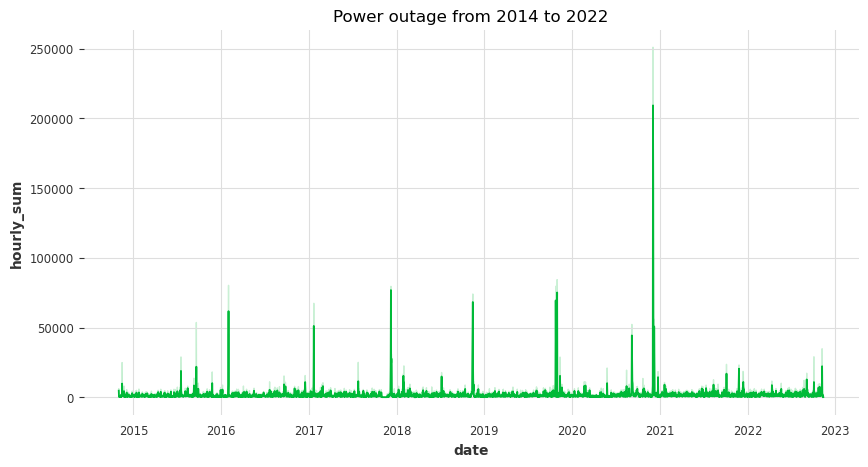

In [149]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.date, y = df["hourly_sum"], color = "#00BA38")
ax.title.set_text('Power outage from 2014 to 2022')

In [152]:
def create_features(df1, label=None):
    """
    Creates time series features from datetime index.
    """
    df1['date'] = df1.date
    df1['hour'] = df1['date'].dt.hour
    df1['dayofweek'] = df1['date'].dt.dayofweek
    df1['quarter'] = df1['date'].dt.quarter
    df1['month'] = df1['date'].dt.month
    df1['year'] = df1['date'].dt.year
    df1['dayofyear'] = df1['date'].dt.dayofyear
    df1['dayofmonth'] = df1['date'].dt.day
    df1['weekofyear'] = df1['date'].dt.weekofyear
    
    X = df1[['date','hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df1[label]
        return X, y
    return X


In [153]:
# See our features and target
X, y = create_features(df, label='hourly_sum')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

C:\Users\halee\AppData\Local\Temp\ipykernel_27300\2197269818.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['weekofyear'] = df1['date'].dt.weekofyear


,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,hourly_sum
0,2014-11-01,0,5,4,11,2014,305,1,44,377.0
1,2014-11-01,0,5,4,11,2014,305,1,44,6512.0
2,2014-11-01,0,5,4,11,2014,305,1,44,11202.0
3,2014-11-01,0,5,4,11,2014,305,1,44,7719.0
4,2014-11-01,0,5,4,11,2014,305,1,44,3458.0


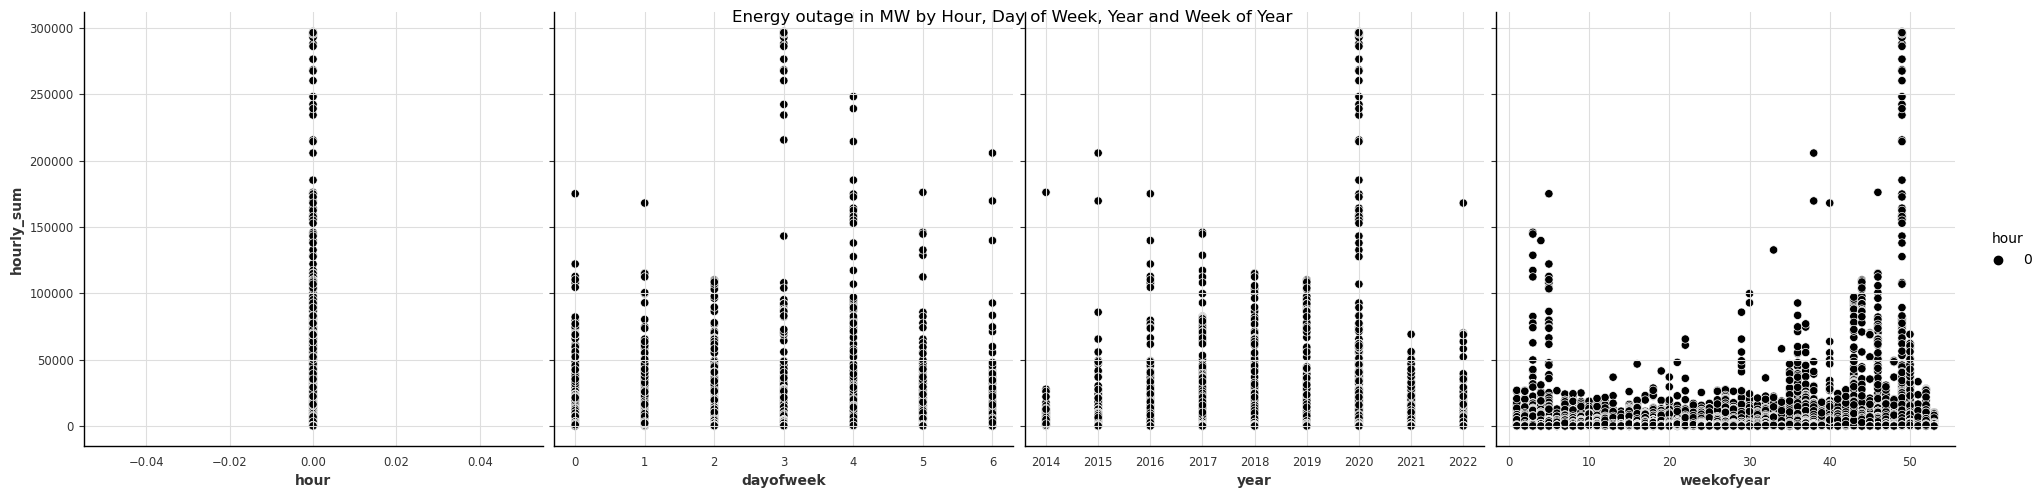

In [154]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek','year','weekofyear'],
             y_vars='hourly_sum',
             height=5,
            )
plt.suptitle('Energy outage in MW by Hour, Day of Week, Year and Week of Year')
plt.show()

In [158]:
split_date = '01-Jun-2021'
df_train = df.loc[df.date <= split_date].copy()
df_test = df.loc[df.date > split_date].copy()

<Axes: xlabel='date', ylabel='hourly_sum'>

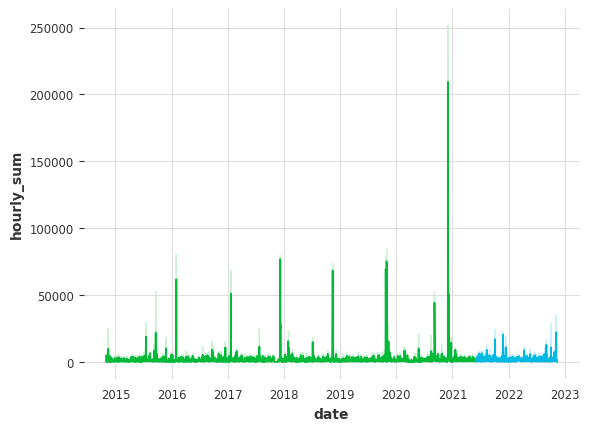

In [159]:
# Plot train and test set to see the split
sns.lineplot(x = df_train.date, y = df_train["hourly_sum"], color = "#00BA38")
sns.lineplot(x = df_test.date, y = df_test["hourly_sum"], color = "#00B9E3")

In [161]:
# Format data for prophet model using ds and y
df_train_prophet = df_train.reset_index().rename(columns={'date':'ds','hourly_sum':'y'})
df_train_prophet.head()

,index,ds,y,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,2014-11-01,377.0,0,5,4,11,2014,305,1,44
1,1,2014-11-01,6512.0,0,5,4,11,2014,305,1,44
2,2,2014-11-01,11202.0,0,5,4,11,2014,305,1,44
3,3,2014-11-01,7719.0,0,5,4,11,2014,305,1,44
4,4,2014-11-01,3458.0,0,5,4,11,2014,305,1,44


In [163]:
# Setup and train model and fit

import prophet
model = Prophet()
model.fit(df_train_prophet)

AttributeError: 'DataFrame' object has no attribute 'has_range_index'

In [164]:
# we reduce the dataset size for speed - the only requirement while doing is to keep at least two complete cycles 
# for each seasonality we intend to fit 
m = Prophet().fit(xdat.iloc[:30000])
future = m.make_future_dataframe(periods = 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast, figsize=(CFG.img_dim1, CFG.img_dim2))
print()

NameError: name 'xdat' is not defined

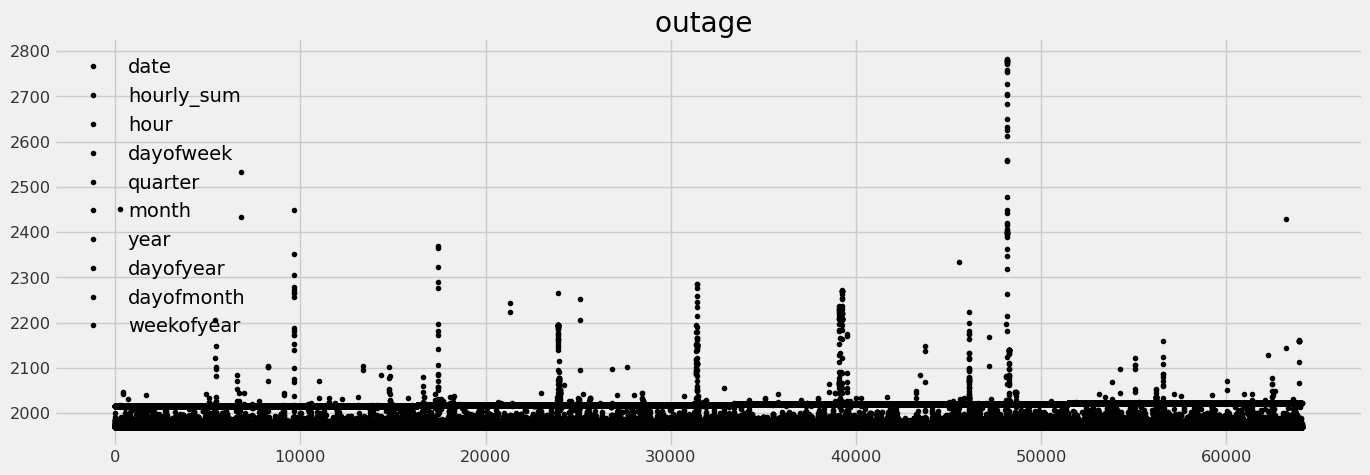

In [169]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='outage ')
plt.show()

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

<Axes: ylabel='Frequency'>

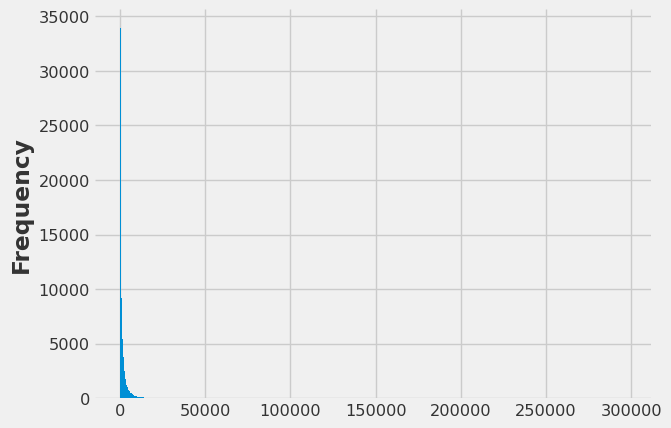

In [170]:
df['hourly_sum'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}>

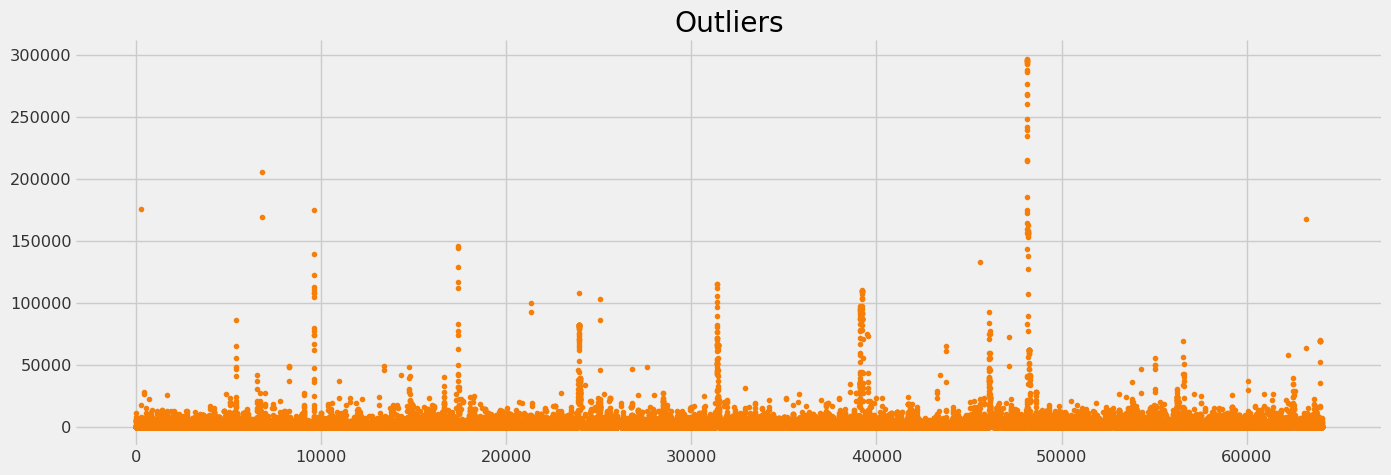

In [173]:
df.query('hourly_sum > 0')['hourly_sum'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [174]:
df = df.query('hourly_sum > 0').copy()

In [177]:
train = df.loc[df.index < '01-01-2020']
test = df.loc[df.index >= '01-01-2020']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2020', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [178]:
train = df.loc[df.index < '01-01-2020']
test = df.loc[df.index >= '01-01-2020']
# Plot the train and test sets
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [263]:
import pandas as pd
from darts import TimeSeries

In [267]:

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df1, "date", "hourly_sum")

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'datetime.date'

In [270]:
   df1['month'] = df1['date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [271]:
df1['date'] = pd.to_datetime(df1['date'])

In [272]:
 df1['month'] = df1['date'].dt.month

In [273]:
df1

,date,hourly_sum,timestamp,month
0,2014-11-01,65732.0,1.414800e+09,11
1,2014-11-02,5471.0,1.414886e+09,11
2,2014-11-03,5513.0,1.414973e+09,11
3,2014-11-04,7409.0,1.415059e+09,11
4,2014-11-05,8799.0,1.415146e+09,11
...,...,...,...,...
2902,2022-11-08,67171.0,1.667866e+09,11
2903,2022-11-09,21563.0,1.667952e+09,11
2904,2022-11-10,9669.0,1.668038e+09,11
2905,2022-11-11,33551.0,1.668125e+09,11


In [276]:
df1=df1.drop(["timestamp"],axis=1)

In [277]:
df1

,date,hourly_sum,month
0,2014-11-01,65732.0,11
1,2014-11-02,5471.0,11
2,2014-11-03,5513.0,11
3,2014-11-04,7409.0,11
4,2014-11-05,8799.0,11
...,...,...,...
2902,2022-11-08,67171.0,11
2903,2022-11-09,21563.0,11
2904,2022-11-10,9669.0,11
2905,2022-11-11,33551.0,11


In [280]:
# Filter rows for the year 2021
df_2021 = df1[df1["date"].dt.year == 2021]

In [282]:
df_2021

,date,hourly_sum,month
2226,2021-01-01,10178.0,1
2227,2021-01-02,6552.0,1
2228,2021-01-03,357.0,1
2229,2021-01-04,22842.0,1
2230,2021-01-05,26325.0,1
...,...,...,...
2586,2021-12-27,34506.0,12
2587,2021-12-28,64410.0,12
2588,2021-12-29,17916.0,12
2589,2021-12-30,14820.0,12


In [283]:

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df_2021, "date", "hourly_sum")

In [284]:
# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [286]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


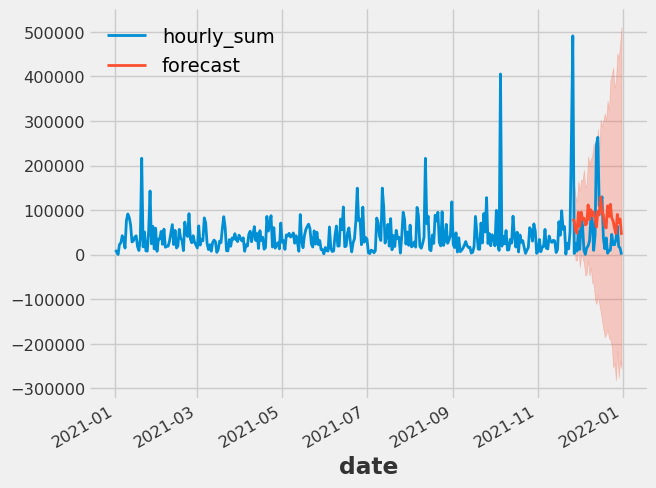

In [287]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [288]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [289]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [290]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

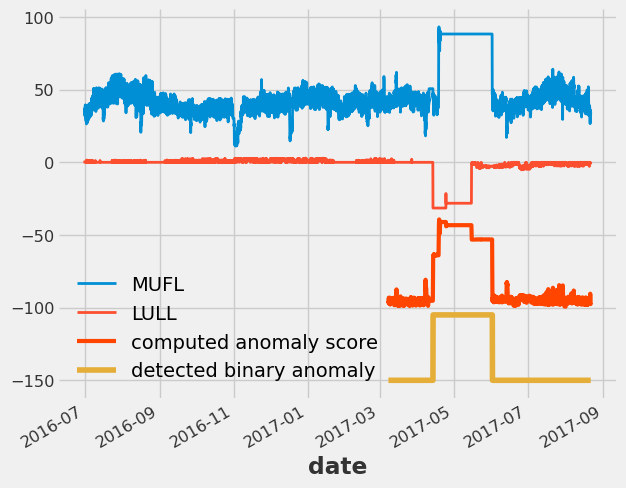

In [291]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [294]:
Series2 = TimeSeries.from_dataframe(df1, 'date', 'hourly_sum',fill_missing_dates=True)

In [295]:
train, val = Series2.split_before(pd.Timestamp('20210101'))

In [296]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


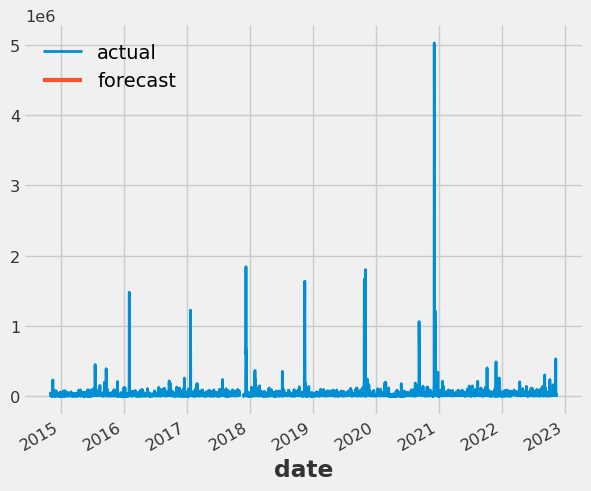

In [297]:
import matplotlib.pyplot as plt

Series2.plot(label = 'actual')
prediction.plot(label = 'forecast', lw = 3)
plt.legend()

In [298]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

ValueError: Input y contains NaN.

In [299]:
from darts.models import FFT

model_fft = FFT()
model_fft.fit(train)
prediction_fft = model_fft.predict(len(val))

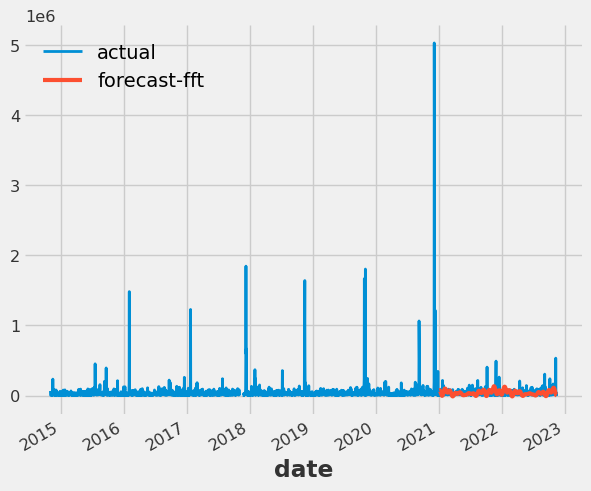

In [300]:
Series2.plot(label = 'actual')
prediction_fft.plot(label = 'forecast-fft', lw = 3)
plt.legend()

In [301]:
# facebook prophet model
from darts.models import Prophet

model_prophet = Prophet()
model_prophet.fit(train)
prediction_prophet = model_prophet.predict(len(val))

10:14:19 - cmdstanpy - INFO - Chain [1] start processing
10:14:19 - cmdstanpy - INFO - Chain [1] done processing


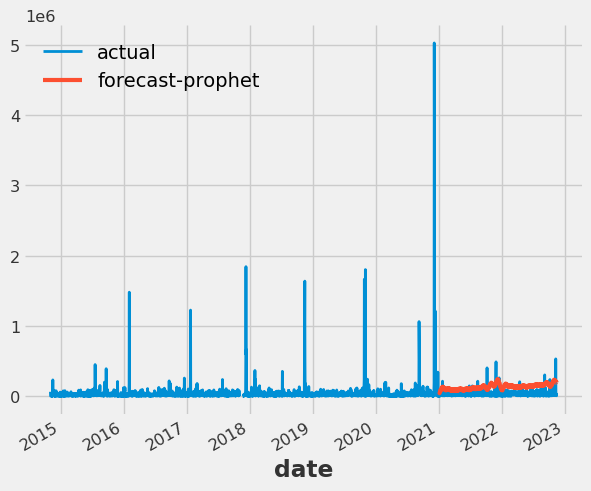

In [302]:
Series2.plot(label = 'actual')
prediction_prophet.plot(label = 'forecast-prophet', lw = 3)
plt.legend()

In [305]:
from darts.backtesting import backtest_forecasting

models = [ExponentialSmoothing(), Prophet()]



ModuleNotFoundError: No module named 'darts.backtesting'

NameError: name 'models' is not defined

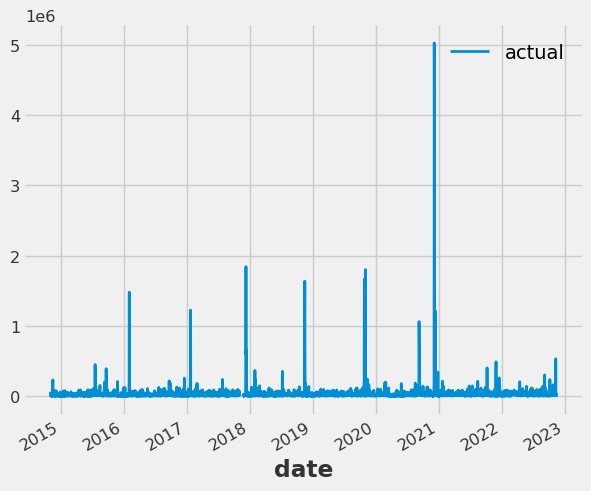

In [306]:
from darts.metrics import mape

Series2.plot(label='actual')
for i, m in enumerate(models):
    err = mape(backtests[i], Series2)
    backtests[i].plot(lw = 3, label = '{}, MAPE = {:.2f}%'.format(m, err))
    
plt.title('Backtest with 3-months forecast horizon')
plt.legend()

In [307]:
test_df = df1[df1['hourly_sum'].isna()]
train_df = df1[~df1['hourly_sum'].isna()]

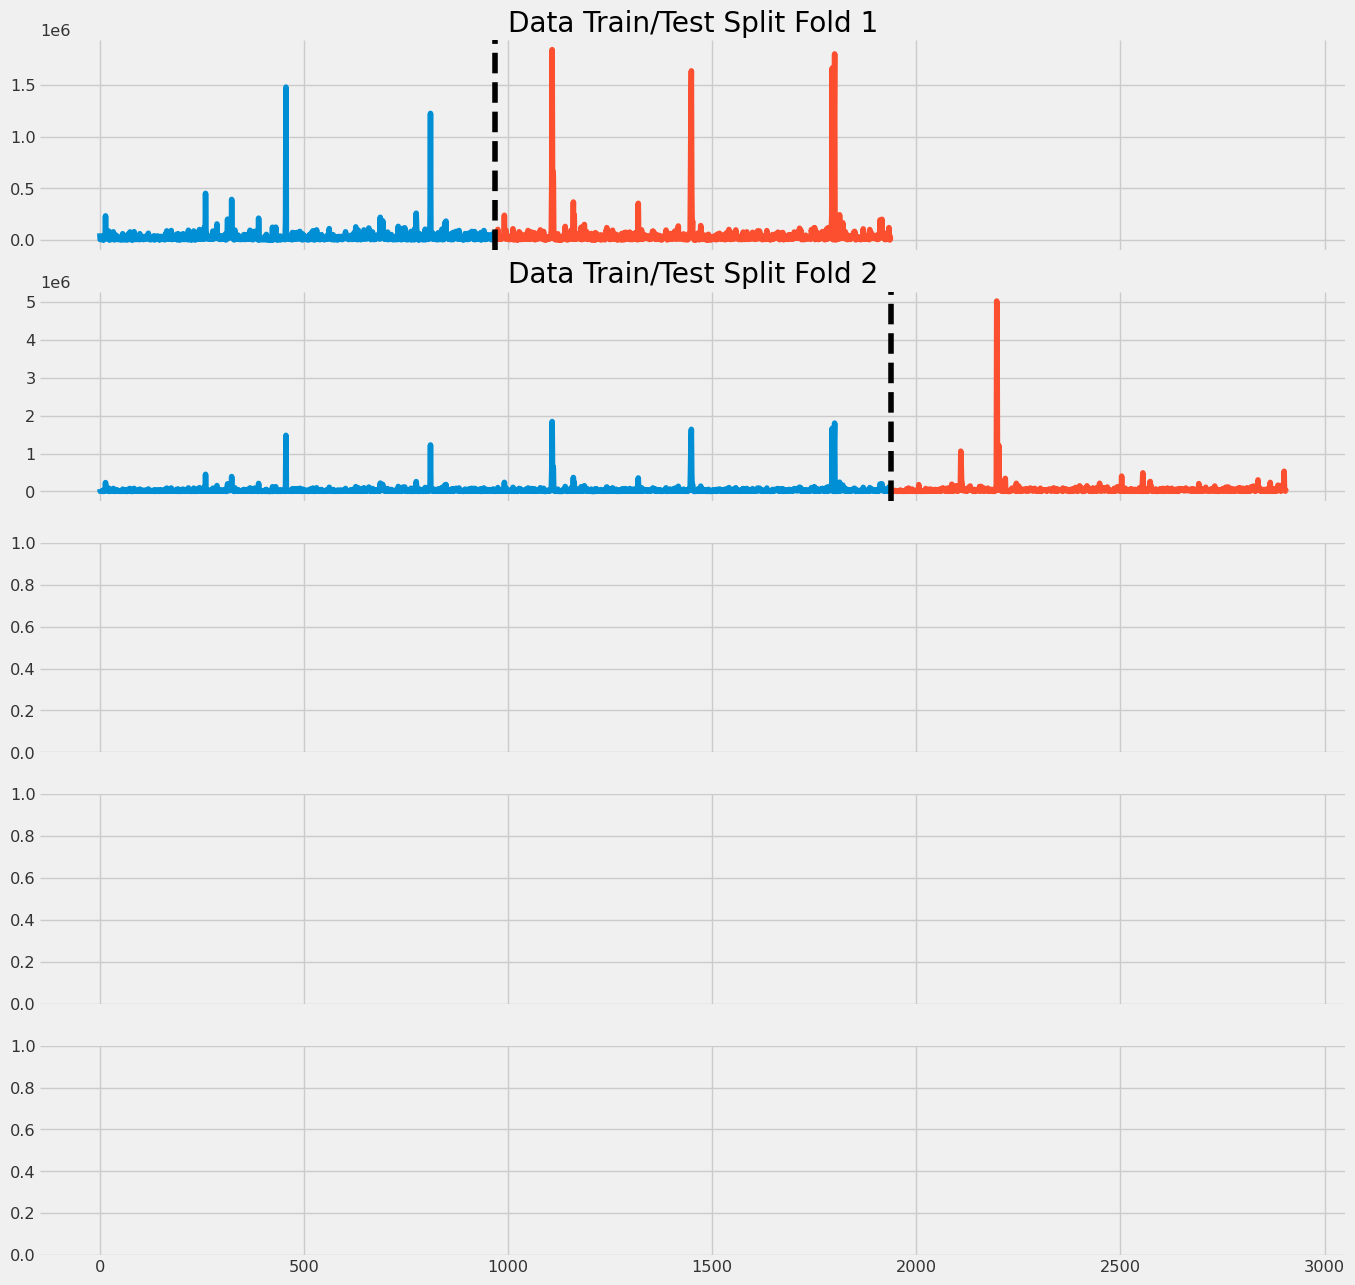

In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cat
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import  TimeSeriesSplit
from darts import TimeSeries
from darts.models import RegressionModel
tss = TimeSeriesSplit(n_splits=2)

fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(train_df):
    train_df.iloc[train_idx]['hourly_sum'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold + 1}')
    train_df.iloc[val_idx]['hourly_sum'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(train_df.iloc[val_idx].index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [313]:
catboost_models = []
fold = 0
scores = []

for train_idx, val_idx in tss.split(train_df):
    train_data = train_df.iloc[train_idx]
    test_data = train_df.iloc[val_idx]

    X_train, y_train = train_data.drop('hourly_sum', axis=1), train_data['hourly_sum']
    X_val, y_val = test_data.drop('hourly_sum', axis=1), test_data['hourly_sum']

    feature_cov_train = TimeSeries.from_Series2(X_train)
    y_train_ts = TimeSeries.from_Series2(y_train)
    feature_cov_test = TimeSeries.from_Series2(X_val)

    model_catboost = RegressionModel(lags=[-24, -128, -256, -512, -1024, -2048, -4096],
                                     lags_future_covariates=[0],
                                     model=cat.CatBoostRegressor(n_estimators=1000,
                                                                 verbose=200,
                                                                 eval_metric='MAPE'))

    print(f'{fold + 1}. Fold Training... ')
    fold += 1
    model_catboost.fit(y_train_ts, future_covariates=feature_cov_train)
    catboost_models.append(model_catboost)
    pred = model_catboost.predict(n=X_val.shape[0], Series2=y_train_ts, future_covariates=feature_cov_test)
    score = mean_absolute_percentage_error(y_val, pred.values())
    scores.append(score)
    del train_data, test_data, model_catboost, X_train, y_train, X_val, y_val

    print(f'Test score => {score}')

print(f'CV score => {np.average(scores)}')

AttributeError: type object 'TimeSeries' has no attribute 'from_Series2'

In [312]:
import pandas as pd
from darts import TimeSeries

# Assuming X_train and y_train are pandas Series containing the input features and target variable
# Convert the "Timestamp" objects to Unix timestamps or any numerical representation you prefer
X_train_numeric = X_train.apply(lambda x: pd.Timestamp(x).timestamp())

# Create the TimeSeries for the input features and target variable
feature_cov_train = TimeSeries.from_series(X_train_numeric)
y_train_ts = TimeSeries.from_series(y_train)

# Assuming X_val and y_val are pandas Series for the validation set
# Convert the "Timestamp" objects to Unix timestamps or any numerical representation you prefer
X_val_numeric = X_val.apply(lambda x: pd.Timestamp(x).timestamp())

# Create the TimeSeries for the input features of the validation set
feature_cov_test = TimeSeries.from_series(X_val_numeric)


TypeError: Cannot convert input [time
0     2014-11-01
1     2014-11-02
2     2014-11-03
3     2014-11-04
4     2014-11-05
         ...    
964   2017-06-28
965   2017-06-29
966   2017-06-30
967   2017-07-01
968   2017-07-02
Name: date, Length: 969, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [317]:
df1=df1.drop(["month",axis==1])

NameError: name 'axis' is not defined

In [318]:
# Convert run_start_time to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Set the run_start_time column as the DataFrame index
df1.set_index('date', inplace=True)

In [319]:
df1

,hourly_sum,month
date,,
2014-11-01,65732.0,11
2014-11-02,5471.0,11
2014-11-03,5513.0,11
2014-11-04,7409.0,11
2014-11-05,8799.0,11
...,...,...
2022-11-08,67171.0,11
2022-11-09,21563.0,11
2022-11-10,9669.0,11


In [322]:
#Creating timeseries object for demand
from darts import TimeSeries
series_demand = TimeSeries.from_dataframe(df1, value_cols='hourly_sum',fill_missing_dates=True)
series_demand

<TimeSeries (DataArray) (date: 2934, component: 1, sample: 1)>
array([[[65732.]],

       [[ 5471.]],

       [[ 5513.]],

       ...,

       [[ 9669.]],

       [[33551.]],

       [[  483.]]])
Coordinates:
  * date       (date) datetime64[ns] 2014-11-01 2014-11-02 ... 2022-11-12
  * component  (component) object 'hourly_sum'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

seasonal? False


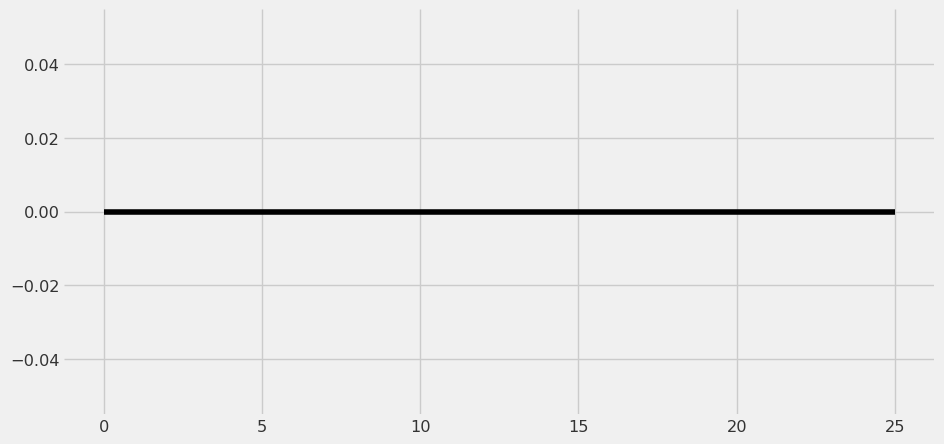

In [323]:
# Check for seasonality
from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(series_demand, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

plot_acf(series_demand, m=12, alpha=0.05)

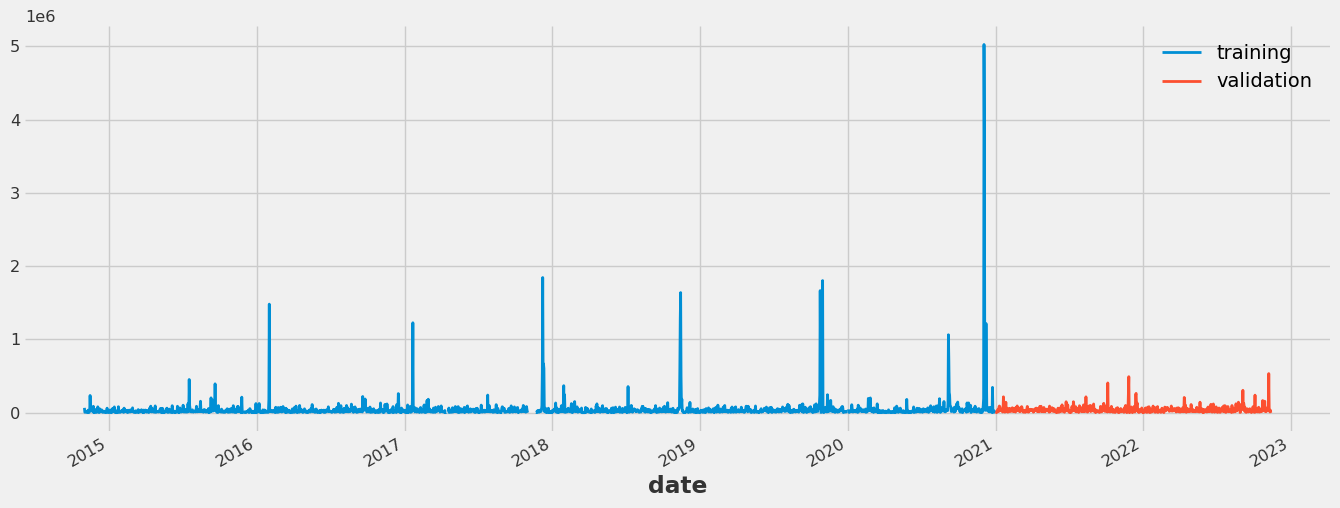

In [324]:
train, val = series_demand.split_before(pd.Timestamp("20210101"))
plt.figure(figsize=(15,5))
train.plot(label="training")
val.plot(label="validation")

In [328]:
from darts.models import ExponentialSmoothing, FFT, Prophet, AutoARIMA, Theta
from darts.metrics import mape, r2_score

def eval_model(model):
    start_time = datetime.now() 
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}% , Training time: {}".format(model, mape(val, forecast), time_elapsed))

eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

AttributeError: module 'datetime' has no attribute 'now'

In [329]:
import pandas as pd
from darts import TimeSeries
from datetime import datetime  # Add this line to import the datetime class

# Your code and functions...

# In your eval_model function, explicitly use the datetime class to call the now() method
def eval_model(model):
    start_time = datetime.now()  # Use datetime.now() instead of just now()
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}% , Training time: {}".format(model, mape(val, forecast), time_elapsed))

eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


model ExponentialSmoothing() obtains MAPE: nan% , Training time: 0:00:00.377044
model FFT() obtains MAPE: 722.10% , Training time: 0:00:00.008045


10:37:00 - cmdstanpy - INFO - Chain [1] start processing
10:37:01 - cmdstanpy - INFO - Chain [1] done processing


model Prophet() obtains MAPE: 3868.69% , Training time: 0:00:00.396017


In [330]:
model_demand = Prophet()
model_demand.fit(train)

10:37:21 - cmdstanpy - INFO - Chain [1] start processing
10:37:21 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

Text(0.5, 1.0, 'MAPE: 3868.688854224952')

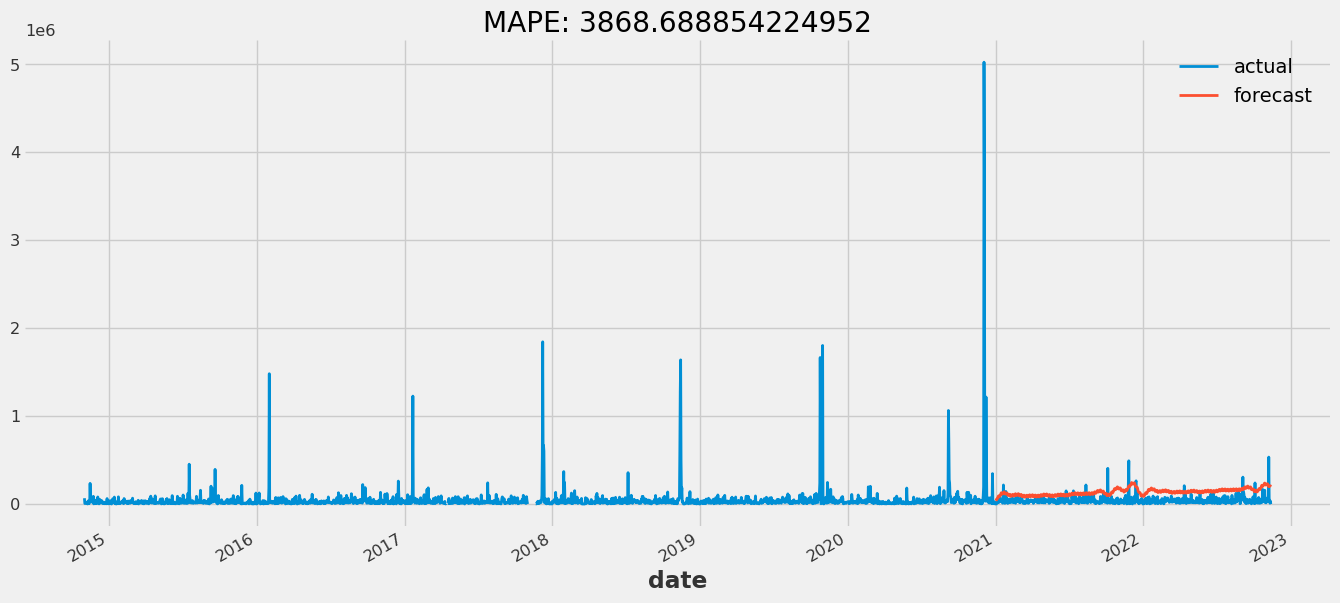

In [331]:
# use the model to make a forecast
pred_demand = model_demand.predict(len(val))

plt.figure(figsize=(15, 6))
series_demand.plot(label="actual")
pred_demand.plot(label="forecast")
plt.title("MAPE: {}".format(mape(val, pred_demand)))

In [336]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

pred_series = model_demand.historical_forecasts(
    series_demand,
    start=pd.Timestamp("2020-09-01"),
    forecast_horizon=30,
    stride=5,
    verbose=True,
)
display_forecast(pred_series, series_demand, "30 day", start_date=pd.Timestamp("2020-09-01"))

  0%|          | 0/155 [00:00<?, ?it/s]

10:44:04 - cmdstanpy - INFO - Chain [1] start processing
10:44:04 - cmdstanpy - INFO - Chain [1] done processing
10:44:04 - cmdstanpy - INFO - Chain [1] start processing
10:44:04 - cmdstanpy - INFO - Chain [1] done processing
10:44:05 - cmdstanpy - INFO - Chain [1] start processing
10:44:05 - cmdstanpy - INFO - Chain [1] done processing
10:44:05 - cmdstanpy - INFO - Chain [1] start processing
10:44:05 - cmdstanpy - INFO - Chain [1] done processing
10:44:05 - cmdstanpy - INFO - Chain [1] start processing
10:44:06 - cmdstanpy - INFO - Chain [1] done processing
10:44:06 - cmdstanpy - INFO - Chain [1] start processing
10:44:06 - cmdstanpy - INFO - Chain [1] done processing
10:44:06 - cmdstanpy - INFO - Chain [1] start processing
10:44:06 - cmdstanpy - INFO - Chain [1] done processing
10:44:07 - cmdstanpy - INFO - Chain [1] start processing
10:44:07 - cmdstanpy - INFO - Chain [1] done processing
10:44:07 - cmdstanpy - INFO - Chain [1] start processing
10:44:07 - cmdstanpy - INFO - Chain [1]

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\halee\\AppData\\Local\\Temp\\tmp37zv08ip\\_c71ojk2.json'

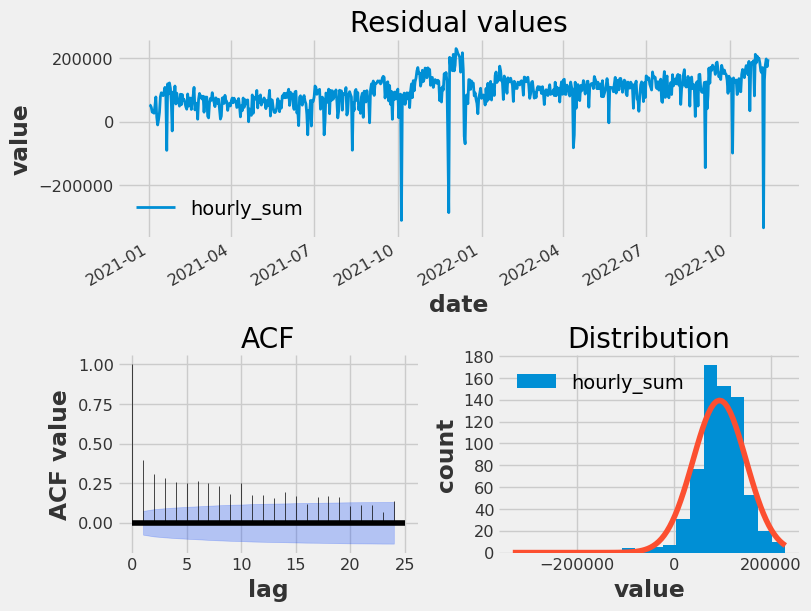

In [334]:
# investigate the residuals in the validation dataset
from darts.utils.statistics import plot_residuals_analysis
resid = pred_demand - val
plot_residuals_analysis(resid);